# Análisis Exploratorio y Curación de Datos

**Todo ejercicio debe tener un análisis fundamentado en la teoría vista en la materia, dicho análisis sera parte del informe a entregar en pdf**

El *dataset* contiene las siguientes columnas:

- **rac y dec** = Posición angular, rac de 0 a 360 y dec de -90 a 90
- **Mag_u,Mag_g,Mag_r,Mag_i,Mag_z**= Estas variables representan una fracción de la luz total que observamos de las galaxias según su frecuencia (como por ejemplo, la frecuencia de radio, para más información [wiki](https://es.wikipedia.org/wiki/Espectro_visible))
- **z** = Es una medida de la distancia a la que se encuentra la galaxia
- **R** = Es una medida del tamaño de la galaxia
- **color**= Como su nombre lo indica es el color más predominante en la galaxia
- **elíptica, espiral, irregular**= Estas columnas identifican el tipo de morfología de las galaxias. Si el valor de una de estas tres columnas es 1, entonces la galaxia tiene esa morfología y las dos restantes tendran el valor 0. 

# Paquetes necesarios 

# AEyC

### Cargar el conjunto de datos 'galaxias1.csv' como un DataFrame, el mismo tiene las propiedades físicas de las galaxias.

- Definir el id como index del DataFrame
- Mostrar el tipo de dato de cada columna 
- Observar si hay filas e indices duplicados, en caso de encontrar valores duplicados decida si los mismos deben ser eliminados, justifique por qué.
- Realicen algunas exploraciones más sobre el dataset
- Remplaze los valores faltantes/NaN/carentes de sentido físico con **KNNImputer**
- Elimine los *outliers* de cada Feature (ver defición de valores atípicos o *outliers* en boxplot.pdf), indique el porcentaje de valores que se están eliminando
- Genere un nuevo DataFramen (df1). 

### Paquetes 

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import numpy as np


In [84]:
data = pd.read_csv('galaxias_1.csv', 
                   sep=',')

In [85]:
data

,objID,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,z,Color,elliptical,spiral,uncertain
0,"1,23765119242489E+018",116.519097,39.886407,17.76235,16.72601,16.33972,16.06614,15.90478,8.393773,0.041521,-1.422625,0,1,0
1,"1,23765149575578E+018",116.451900,41.421270,18.12179,16.26214,15.39272,14.97515,14.65105,9.674847,0.040211,-2.729061,0,0,1
2,"1,23767370611537E+018",115.946713,41.918877,18.57293,17.42053,17.01788,16.75617,16.70899,11.277470,0.024386,-1.555044,0,0,1
3,"1,2376737066523E+018",116.051943,42.287231,21.37438,19.77335,19.55791,20.35405,18.88184,1.539542,0.039137,-1.816479,0,0,1
4,"1,23765127349266E+018",117.287392,43.434782,19.18845,17.99682,17.51119,17.26241,17.09056,12.471450,0.042591,-1.677259,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92097,"1,23765494945271E+018",245.038742,50.552353,19.65135,17.74399,16.86763,16.43538,16.09720,3.514471,0.048618,-2.783718,0,0,1
92098,"1,23765153764514E+018",219.313588,62.338577,18.77944,17.71890,17.35237,17.14414,17.04369,4.985637,0.036884,-1.427076,0,0,1
92099,"1,237655744025E+018",239.043213,4.601942,18.93000,17.34099,16.79838,16.53403,16.52089,13.324690,0.034145,-2.131620,0,1,0
92100,"1,23765546806247E+018",229.410394,0.947489,19.52601,17.68973,16.90745,16.50974,16.21097,4.854905,0.039585,-2.618553,0,0,1


Es necesario hacer esto antes de resetear el index

In [86]:
clase=[]
for i in range(0,data.shape[0]):
    if data.elliptical[i]==1:
        clase.append('E')
    elif data.spiral[i]==1:
        clase.append('S')
    elif data.uncertain[i]==1:
        clase.append('I')
data['clase']=clase

Setear objID como el index

In [88]:
data.set_index('objID')
data.head(10)

,objID,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,z,Color,elliptical,spiral,uncertain,clase
0,"1,23765119242489E+018",116.519097,39.886407,17.76235,16.72601,16.33972,16.06614,15.90478,8.393773,0.041521,-1.422625,0,1,0,S
1,"1,23765149575578E+018",116.451900,41.421270,18.12179,16.26214,15.39272,14.97515,14.65105,9.674847,0.040211,-2.729061,0,0,1,I
2,"1,23767370611537E+018",115.946713,41.918877,18.57293,17.42053,17.01788,16.75617,16.70899,11.277470,0.024386,-1.555044,0,0,1,I
3,"1,2376737066523E+018",116.051943,42.287231,21.37438,19.77335,19.55791,20.35405,18.88184,1.539542,0.039137,-1.816479,0,0,1,I
4,"1,23765127349266E+018",117.287392,43.434782,19.18845,17.99682,17.51119,17.26241,17.09056,12.471450,0.042591,-1.677259,0,0,1,I
5,"1,23765439217644E+018",118.240207,39.303836,19.59416,17.93481,17.08008,16.59757,16.25638,4.271867,0.040652,-2.514088,0,0,1,I
6,"1,23765119135154E+018",118.113313,40.326451,18.47173,17.38419,17.07661,16.86419,16.68099,8.146015,0.041786,-1.395113,0,0,1,I
7,"1,23765149629429E+018",118.716505,44.919518,18.47102,17.13574,16.62685,16.32869,16.24557,12.931770,0.045511,-1.844164,0,1,0,S
8,"1,23767370557974E+018",119.822479,42.008528,17.36539,15.46586,14.54658,14.07490,13.69937,18.121160,0.043644,-2.818807,1,0,0,E
9,"1,23767370557974E+018",119.822479,42.008528,17.36539,15.46586,14.54658,14.07490,13.69937,18.121160,0.043654,-2.818807,1,0,0,E


rapido vemos que las filas 8 y 9 tienen el mismo ID.

miramos los datatype, y notamos ademas que no hay valores faltantes.

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92102 entries, 0 to 92101
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   objID       92102 non-null  object 
 1   ra          92102 non-null  float64
 2   dec         92102 non-null  float64
 3   modelMag_u  92102 non-null  float64
 4   modelMag_g  92102 non-null  float64
 5   modelMag_r  92102 non-null  float64
 6   modelMag_i  92102 non-null  float64
 7   modelMag_z  92102 non-null  float64
 8   petroR90_r  92102 non-null  float64
 9   z           92102 non-null  float64
 10  Color       92102 non-null  float64
 11  elliptical  92102 non-null  int64  
 12  spiral      92102 non-null  int64  
 13  uncertain   92102 non-null  int64  
 14  clase       92102 non-null  object 
dtypes: float64(10), int64(3), object(2)
memory usage: 10.5+ MB


busco eliminar los duplicados porque no tiene sentido utilizar dos veces el mismo dato.

In [90]:
data.shape

(92102, 15)

In [91]:
data = data.drop_duplicates(subset='objID')
data.shape

(57681, 15)

Antes de seguir voy a eliminar los nulls y a agregar una columna con la clase de galaxia, tal como hicimos en el primer trabajo.

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57681 entries, 0 to 92099
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   objID       57681 non-null  object 
 1   ra          57681 non-null  float64
 2   dec         57681 non-null  float64
 3   modelMag_u  57681 non-null  float64
 4   modelMag_g  57681 non-null  float64
 5   modelMag_r  57681 non-null  float64
 6   modelMag_i  57681 non-null  float64
 7   modelMag_z  57681 non-null  float64
 8   petroR90_r  57681 non-null  float64
 9   z           57681 non-null  float64
 10  Color       57681 non-null  float64
 11  elliptical  57681 non-null  int64  
 12  spiral      57681 non-null  int64  
 13  uncertain   57681 non-null  int64  
 14  clase       57681 non-null  object 
dtypes: float64(10), int64(3), object(2)
memory usage: 7.0+ MB


In [93]:
data.reset_index()

,index,objID,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,z,Color,elliptical,spiral,uncertain,clase
0,0,"1,23765119242489E+018",116.519097,39.886407,17.76235,16.72601,16.33972,16.06614,15.90478,8.393773,0.041521,-1.422625,0,1,0,S
1,1,"1,23765149575578E+018",116.451900,41.421270,18.12179,16.26214,15.39272,14.97515,14.65105,9.674847,0.040211,-2.729061,0,0,1,I
2,2,"1,23767370611537E+018",115.946713,41.918877,18.57293,17.42053,17.01788,16.75617,16.70899,11.277470,0.024386,-1.555044,0,0,1,I
3,3,"1,2376737066523E+018",116.051943,42.287231,21.37438,19.77335,19.55791,20.35405,18.88184,1.539542,0.039137,-1.816479,0,0,1,I
4,4,"1,23765127349266E+018",117.287392,43.434782,19.18845,17.99682,17.51119,17.26241,17.09056,12.471450,0.042591,-1.677259,0,0,1,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57676,92093,"1,23766556715083E+018",231.130092,18.628772,18.31966,16.61474,15.80569,15.41106,15.11063,9.954793,0.029269,-2.513965,1,0,0,E
57677,92096,"1,23765495320163E+018",245.132716,49.797424,18.05554,17.05332,16.70874,16.50322,16.34947,9.012850,0.040825,-1.346800,0,0,1,I
57678,92097,"1,23765494945271E+018",245.038742,50.552353,19.65135,17.74399,16.86763,16.43538,16.09720,3.514471,0.048618,-2.783718,0,0,1,I
57679,92098,"1,23765153764514E+018",219.313588,62.338577,18.77944,17.71890,17.35237,17.14414,17.04369,4.985637,0.036884,-1.427076,0,0,1,I


Ahora seteo bien el index que recien quedo mal no se xq.

In [94]:
data.set_index('objID')

,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,z,Color,elliptical,spiral,uncertain,clase
objID,,,,,,,,,,,,,,
"1,23765119242489E+018",116.519097,39.886407,17.76235,16.72601,16.33972,16.06614,15.90478,8.393773,0.041521,-1.422625,0,1,0,S
"1,23765149575578E+018",116.451900,41.421270,18.12179,16.26214,15.39272,14.97515,14.65105,9.674847,0.040211,-2.729061,0,0,1,I
"1,23767370611537E+018",115.946713,41.918877,18.57293,17.42053,17.01788,16.75617,16.70899,11.277470,0.024386,-1.555044,0,0,1,I
"1,2376737066523E+018",116.051943,42.287231,21.37438,19.77335,19.55791,20.35405,18.88184,1.539542,0.039137,-1.816479,0,0,1,I
"1,23765127349266E+018",117.287392,43.434782,19.18845,17.99682,17.51119,17.26241,17.09056,12.471450,0.042591,-1.677259,0,0,1,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1,23766556715083E+018",231.130092,18.628772,18.31966,16.61474,15.80569,15.41106,15.11063,9.954793,0.029269,-2.513965,1,0,0,E
"1,23765495320163E+018",245.132716,49.797424,18.05554,17.05332,16.70874,16.50322,16.34947,9.012850,0.040825,-1.346800,0,0,1,I
"1,23765494945271E+018",245.038742,50.552353,19.65135,17.74399,16.86763,16.43538,16.09720,3.514471,0.048618,-2.783718,0,0,1,I


#### otras exploraciones...

In [95]:
data.describe()

,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,z,Color,elliptical,spiral,uncertain
count,57681.000000,57681.000000,57681.000000,57681.000000,57681.000000,57681.000000,57681.000000,57681.000000,57681.000000,57681.000000,57681.000000,57681.000000,57681.000000
mean,183.419958,25.380842,183.765182,172.718436,162.646477,170.157392,136.560776,54.057630,0.035991,-3.416101,0.074409,0.344481,0.581110
std,57.659031,18.616160,1734.388143,1622.623065,1540.039554,1568.942667,1383.827414,882.310694,0.008498,72.031187,0.262438,0.475203,0.493382
min,0.008745,-11.202394,-9999.000000,-9999.000000,11.902330,11.459980,-9999.000000,0.842248,0.020001,-2859.000000,0.000000,0.000000,0.000000
25%,151.447181,10.476006,17.752040,16.314860,15.647160,15.287560,15.006410,6.132339,0.028957,-2.431772,0.000000,0.000000,0.000000
50%,183.931359,23.898519,18.447040,17.119080,16.555560,16.247150,16.020130,8.386065,0.036099,-1.898378,0.000000,0.000000,1.000000
75%,221.634978,39.408083,19.011310,17.738920,17.255280,16.983440,16.798670,11.335120,0.043573,-1.570280,0.000000,1.000000,1.000000
max,359.965567,70.133213,25756.000000,20542.000000,19138.000000,23871.000000,20767.000000,78255.000000,0.050000,10015.860000,1.000000,1.000000,1.000000


vemos de nuevo los valores de -9999 y de 10015.86, en la variable color tambien hay un minimo de -2859.

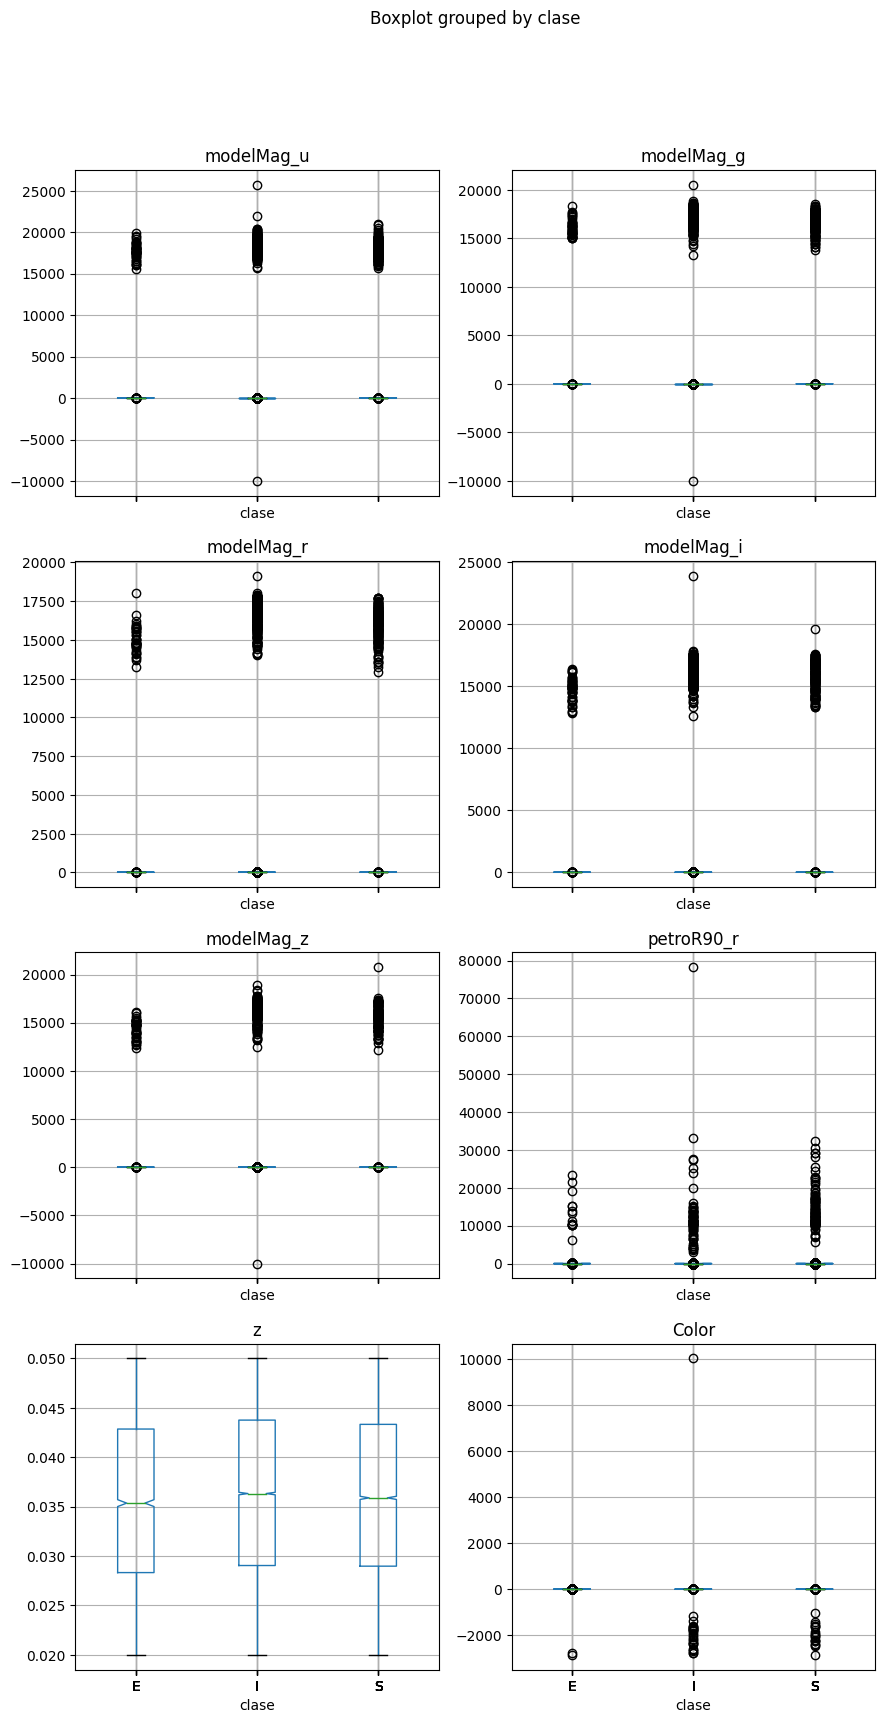

In [109]:
fig, ax = plt.subplots(4, 2,sharex=True, figsize=(10, 20))
data.boxplot('modelMag_u','clase',notch=True, ax=ax[0][0])
data.boxplot('modelMag_g','clase',notch=True, ax=ax[0][1])
data.boxplot('modelMag_r','clase',notch=True, ax=ax[1][0])
data.boxplot('modelMag_i','clase',notch=True, ax=ax[1][1])
data.boxplot('modelMag_z','clase',notch=True, ax=ax[2][0])
data.boxplot('petroR90_r','clase',notch=True, ax=ax[2][1])
data.boxplot('z','clase', notch=True,ax=ax[3][0])
data.boxplot('Color','clase',notch=True, ax=ax[3][1])
plt.savefig('imagen/boxplot.png')

 #### lo primero que resalta en estos boxplot es que hay muchisimos datos con magnitudes elevadas, lo cual no tiene sentido fisico ya que mientras mas alta la magnitud mas debil el objeto, y magnitudes de 10000 son imposibles de detectar. Por ejemplo, el telescopio Pan-STARRS de hawaii tiene una magnitud limite de 24.

In [108]:
data[data['modelMag_z']>19]

,objID,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,z,Color,elliptical,spiral,uncertain,clase
278,"1,23765842353901E+018",126.194607,3.772450,19.02475,17.88916,17.45983,17.22953,17076.00000,5.633001,0.035114,-1.564924,0,0,1,I
355,"1,23766732272809E+018",205.324716,25.713591,18.55107,17.60185,17.21901,17.04464,16866.00000,5.529673,0.028324,-1.332060,0,0,1,I
394,"1,23765914455815E+018",210.754636,56.595806,19.03890,17.72025,17.14367,16.81314,16602.00000,4.417403,0.041212,-1.895231,0,0,1,I
551,"1,23767370611569E+018",116.821205,42.082342,22.11735,20.68927,19.99911,19.86847,19.63993,1.420692,0.028140,-2.118233,0,0,1,I
646,"1,23766196849921E+018",170.458442,42.462408,17.63293,16.55140,16.13713,15.91924,15738.00000,10.432690,0.024641,-1.495804,0,1,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90852,"1,23765649456372E+018",329.563669,11.490230,17.23247,15.72444,14.93893,14.53259,14191.00000,10.355370,0.031054,-2.293537,0,1,0,S
90952,"1,23766263691136E+018",237.767784,9.115903,18.64422,17.34979,16.77861,16.45554,16202.00000,4.810450,0.043245,-1.865610,0,0,1,I
91286,"1,23767465099736E+018",168.379962,0.505805,18.44548,17.47041,17.05026,16.84231,16684.00000,7.704356,0.029553,-1.395224,0,0,1,I
91528,"1,23766222352941E+018",181.320160,38.881953,17.50278,15.63130,14.73923,14.30840,13962.00000,15.180140,0.038426,-2.763548,1,0,0,E


In [99]:
data[data['Color']>10] #este dato tiene muchas variables carentes de sentido, no solo el color.

,objID,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,z,Color,elliptical,spiral,uncertain,clase
2379,"1,2376487035148E+018",209.589671,-0.625217,-9999.0,-9999.0,16.85656,16.53999,-9999.0,6.973291,0.027598,10015.86,0,0,1,I


In [100]:
data[data['petroR90_r']>70000] #la unica anomalia de este dato esta en el tamaño

,objID,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,z,Color,elliptical,spiral,uncertain,clase
72603,"1,23766378421649E+018",43.707859,0.040968,17.38318,15.70524,14.96634,14.5301,14.21008,78255.0,0.041095,-2.416843,0,0,1,I


In [102]:
data[data['modelMag_z']<-5000] #este dato es el mismo dato anomalo de la variable color

,objID,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,z,Color,elliptical,spiral,uncertain,clase
2379,"1,2376487035148E+018",209.589671,-0.625217,-9999.0,-9999.0,16.85656,16.53999,-9999.0,6.973291,0.027598,10015.86,0,0,1,I


In [104]:
data[data['modelMag_i']>19000] #a estos los puedo considerar outliers simplemente,
                               #aunque el primer dato tiene pinta de anormal.

,objID,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,z,Color,elliptical,spiral,uncertain,clase
407,"1,23766223748071E+018",217.938535,8.290958,20.36873,19.29713,20.14230,23871.0,18.82917,2.507162,0.029891,-0.226438,0,0,1,I
14494,"1,23766630055838E+018",56.615146,-0.033488,24.70692,21.09019,17.51249,19575.0,19.03318,5.763434,0.037699,-7.194427,0,1,0,S


### Cargar los valores de las imágenes correspondientes a las galaxias de df1.

Se toman las posciones angulares (ra, dec) de cada  galaxia y se descargan sus correspondientes imágenes en los filtros **g**, **r** y **z**. 

Todos los filtros para SDSS
**'Optical:SDSS**: ['SDSSg',
                  'SDSSi',
                  'SDSSr',
                  'SDSSu',
                  'SDSSz']

In [ ]:
from astropy.coordinates import SkyCoord

# Ejemplo de una sola imagen
coords_gx = SkyCoord(df1.ra.iloc[2], df1.dec.iloc[2], unit=(u.deg, u.deg))
img = SkyView.get_images(position=coords_gx, survey=['SDSSg', 'SDSSi', 'SDSSr', 'SDSSu', 'SDSSz'])

# Visualización de una de las galaxias.
img[0][0].data
from matplotlib.colors import LogNorm

plt.imshow(img[0][0].data, cmap='Blues', norm=LogNorm(), origin='lower')
plt.colorbar()

Muestre:

    - Qué tamaños tienen las imágenes. 
    - Cuántas bandas/filtros tiene cada imagen.
    
Genere un dataframe (df2) en donde cada fila es una imagen y las columnas son los valores de cada px por filtro, por lo tanto, si las imagenes tienen un tamaño (Xpx, Ypx) y cunta con f filtros, entonces la cantidad de columnas de df2 son Xpx\*Ypx\*f. 

Tome una sola fila de df2 y muestre a partir de un gráfico la distribución de valores de los px en cada filtro en un rango de pxs. 

Por ultimo una df1 y df2 y guarde como un .csv

# Componentes Principales 

Ajuste el modelo de CPA  al df1 con n=3 el número de componentes principales. Grafique.